In [1]:
import pandas as pd
import numpy as np
# Time series is acollection of data points that are organized by time
#Arima:Auto regressive integrated moving avearge used for analysis and forecasting
#ARIMA(p,d,q)
# time series is a collection of dat points that are organized b time
# ARIMA: Auto Regressive Integrated Moing Avargae used for anaylsis and forcosting
# ARIMA(p,d,q): p is for AR, d is for I q is for MA
# AR - Auto regressive 
# MA - moving Average
# I- Integration
# p: Order of AR component (number of lagged observation)
# q: Order of MA component (lagged forcast error)
# d: Order of integration

In [2]:
df=pd.read_csv('exchange_rate (1).csv',parse_dates=True)
#
#parse_dates=True(converts data strings into data time objects(day,month and year))

In [3]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
import matplotlib.pyplot as plt

<Axes: >

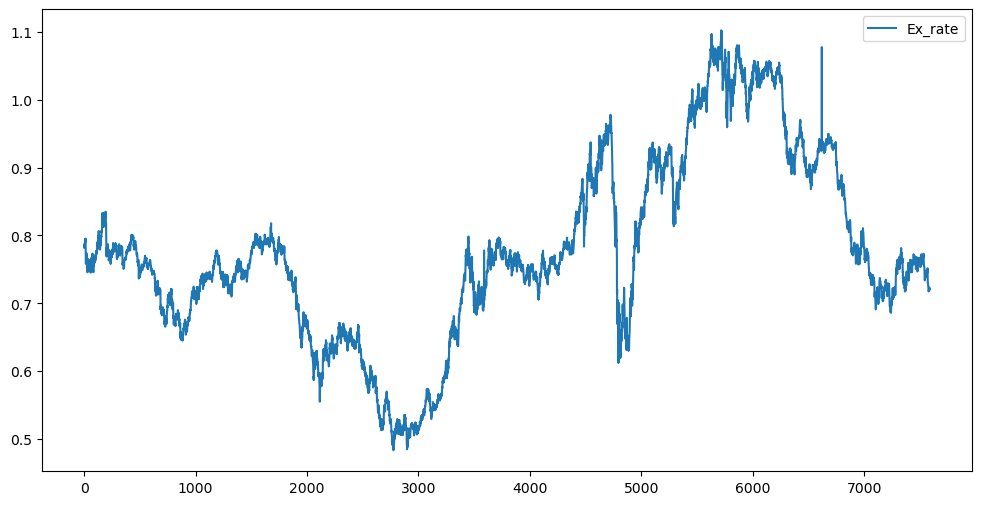

In [5]:
df.plot(figsize=(12,6))
#12=length,6=width

In [6]:
!pip install pmdarima
# pmdarima aids to identify the most optimal paramaters for an arima model(p,d,q)
#p=The number of autoregressive terms(lags of dependent variable)
#d=Integration(Time differentiation)
# q= MA

In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
#auto-arima is a time series forecasting method thatautomatically 
#determines the optimal parameter(p,d,q)

In [8]:
stepwise_fit=auto_arima(df['Ex_rate'],trace=True,suppress_warnings=True)

stepwise_fit.summary()
#AIC(Akaike Information criteria,statistical function,best fit model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=1.90 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=3.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=1.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=3.80 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=2.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=1.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.316, Time=2.61 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 24.524 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Fri, 06 Jun 2025   AIC                         -56104.319
Time:                        15:35:30   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#


In [10]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 2) (30, 2)


In [11]:
train

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7553,06-09-2010 00:00,0.747831
7554,07-09-2010 00:00,0.746436
7555,08-09-2010 00:00,0.738662
7556,09-09-2010 00:00,0.741125


In [12]:
from statsmodels.tsa.arima.model import ARIMA
# Four components of Time series
# Trend,Seasonality,Cyclicity,Irregular/ Noise

In [13]:
model=ARIMA(train['Ex_rate'],order=(1,1,0))
model=model.fit()
model.summary()
# Bayesian Information criteria(model fit and complexity<model
#lowest bic value is prefered
#Hannon-quinn information criteria,Lowest HQIC IS PREFERRED)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Fri, 06 Jun 2025   AIC                         -55864.938
Time:                        15:35:31   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64
7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.7

<Axes: >

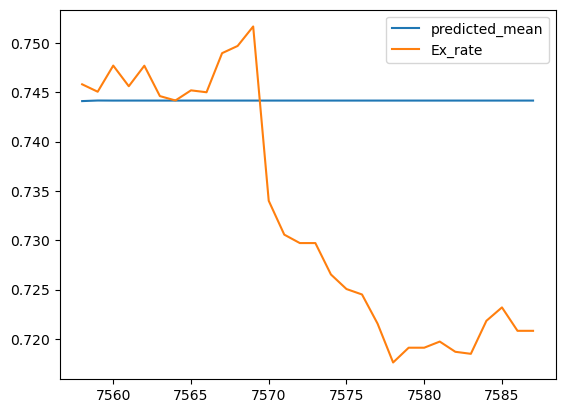

In [15]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [16]:
test['Ex_rate'].mean()

0.732738

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.016634697604867923


In [18]:
model2=ARIMA(df['Ex_rate'],order=(0,0,0))
model2=model2.fit()
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [19]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred = pred.rename('ARIMA Predictions')
print(pred)

7588    0.776969
7589    0.776969
7590    0.776969
7591    0.776969
7592    0.776969
7593    0.776969
7594    0.776969
7595    0.776969
7596    0.776969
7597    0.776969
7598    0.776969
7599    0.776969
7600    0.776969
7601    0.776969
7602    0.776969
7603    0.776969
7604    0.776969
7605    0.776969
7606    0.776969
7607    0.776969
7608    0.776969
7609    0.776969
7610    0.776969
7611    0.776969
7612    0.776969
7613    0.776969
7614    0.776969
7615    0.776969
7616    0.776969
7617    0.776969
7618    0.776969
Name: ARIMA Predictions, dtype: float64


<Axes: >

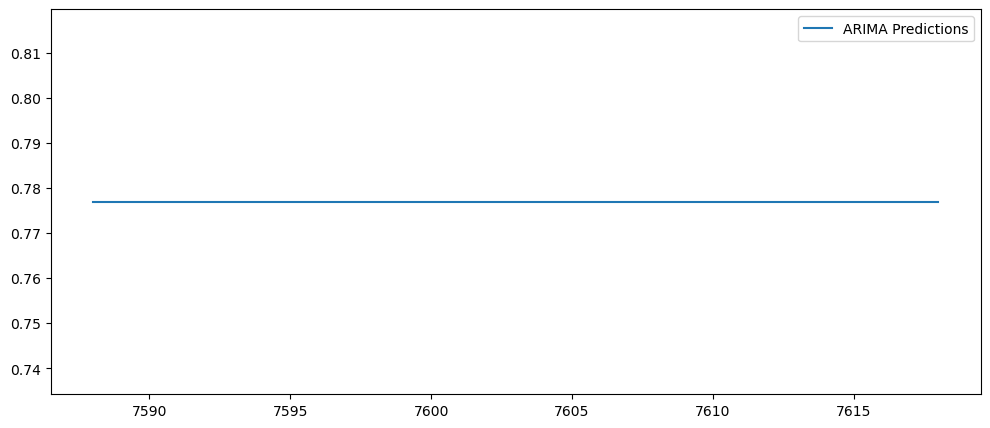

In [20]:
pred.plot(figsize=(12,5),legend=True)